
# Project: Investigate a Dataset (TMDb Movie Data).
In this project, we'll go through the data analysis process and see how everything fits together.
we'll use the Python libraries NumPy, pandas, and Matplotlib, which make writing data analysis code in Python a lot easier.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### Investigate a dataset of tmdb-movies.
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
### Data Set:
* Nmber of rows= 10866 rows
* Nmber of rows= 21 columns
### Questions:
1. calculate gross profit for all movies and knowing which one have the highest and the lowest gross profit ?
2. Which year has the highest number of released movies?
3. Which Movie has the Longest And the Shortest Rintime?
4. Which movie has the highest and the lowest budget ?
5. Which Genres Have The Highest number of released movies?
6. What kinds of properties are associated with movies that have high revenues?

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [226]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [227]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [229]:
df.keywords

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object


## Data Cleaning

1. We need to remove unused column.
2. Removing the duplicacy in the rows.
3. Some movies in the database have zero budget or zero revenue.
4. Changing release date column into date format.
5. Changing format of budget and revenue column.


In [230]:
#deleting the unnecessary columns
df.drop([ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis=1,inplace=True)

#previewing the new dataset
df.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One Choice Can Destroy You      119   
3  Every generation has a story.      136   
4            Vengeance Hits Home      137   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller       6/9/15          2015  
1  Action|Adventure|Science Fiction|Thriller      5/13/15          2015  
2         Adventure|Science Fiction|Thriller      3/18/15          2015  
3   Action|Adventure|Science Fiction|Fantasy     12/15/15          2015  
4                      Action|Crime|Thriller       4/1/15          2015

In [231]:
### Removing the duplicacy in the rows.

df.drop_duplicates(inplace=True)
df.head()

popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One Choice Can Destroy You      119   
3  Every generation has a story.      136   
4            Vengeance Hits Home      137   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller       6/9/15          2015  
1  Action|Adventure|Science Fiction|Thriller      5/13/15          2015  
2         Adventure|Science Fiction|Thriller      3/18/15          2015  
3   Action|Adventure|Science Fiction|Fantasy     12/15/15          2015  
4                      Action|Crime|Thriller       4/1/15          2015

In [232]:
### deleting zeros and NAN values.

# creating a seperate list of revenue and budget column
trash_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[trash_list] = df[trash_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = trash_list, inplace = True)


In [233]:
### Changing release date column into date format.

df.release_date = pd.to_datetime(df['release_date'])



In [234]:
### checking budget & revenue Dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3854 non-null   float64       
 1   budget          3854 non-null   float64       
 2   revenue         3854 non-null   float64       
 3   original_title  3854 non-null   object        
 4   cast            3850 non-null   object        
 5   director        3853 non-null   object        
 6   tagline         3574 non-null   object        
 7   runtime         3854 non-null   int64         
 8   genres          3854 non-null   object        
 9   release_date    3854 non-null   datetime64[ns]
 10  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 361.3+ KB


In [235]:
### convert budget & revenue Dtype to integer.

df['revenue']=df['revenue'].apply(np.int64)

df['budget']=df['budget'].apply(np.int64)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3854 non-null   float64       
 1   budget          3854 non-null   int64         
 2   revenue         3854 non-null   int64         
 3   original_title  3854 non-null   object        
 4   cast            3850 non-null   object        
 5   director        3853 non-null   object        
 6   tagline         3574 non-null   object        
 7   runtime         3854 non-null   int64         
 8   genres          3854 non-null   object        
 9   release_date    3854 non-null   datetime64[ns]
 10  release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 361.3+ KB


In [236]:
df.isnull()

popularity  budget  revenue  original_title   cast  director  tagline  \
0           False   False    False           False  False     False    False   
1           False   False    False           False  False     False    False   
2           False   False    False           False  False     False    False   
3           False   False    False           False  False     False    False   
4           False   False    False           False  False     False    False   
...           ...     ...      ...             ...    ...       ...      ...   
10822       False   False    False           False  False     False    False   
10828       False   False    False           False  False     False    False   
10829       False   False    False           False  False     False    False   
10835       False   False    False           False  False     False    False   
10848       False   False    False           False  False     False    False   

       runtime  genres  release_date  release_year  
0        False   False         False         False  
1        False   False         False         False  
2        False   False         False         False  
3        False   False         False         False  
4        False   False         False         False  
...        ...     ...           ...           ...  
10822    False   False         False         False  
10828    False   False         False         False  
10829    False   False         False         False  
10835    False   False         False         False  
10848    False   False         False         False  

[3854 rows x 11 columns]

<a id='eda'></a>
# Exploratory Data Analysis



## calculate gross profit for all movies and knowing which one have the highest and the lowest gross profit ?

In [237]:
### calculate gross profit
df.insert(2,'gross_profit',df['revenue']-df['budget'])
df.head()

popularity     budget  gross_profit     revenue  \
0   32.985763  150000000    1363528810  1513528810   
1   28.419936  150000000     228436354   378436354   
2   13.112507  110000000     185238201   295238201   
3   11.173104  200000000    1868178225  2068178225   
4    9.335014  190000000    1316249360  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One Choice Can Destroy You      119   
3  Every generation has a story.      136   
4            Vengeance Hits Home      137   

                                      genres release_date  release_year  
0  Action|Adventure|Science Fiction|Thriller   2015-06-09          2015  
1  Action|Adventure|Science Fiction|Thriller   2015-05-13          2015  
2         Adventure|Science Fiction|Thriller   2015-03-18          2015  
3   Action|Adventure|Science Fiction|Fantasy   2015-12-15          2015  
4                      Action|Crime|Thriller   2015-04-01          2015

In [238]:
### define a function that will return the maximum and minimum and we will use it later in any discussion.
def max_min(x):
    # find the index of lowest profit movie.
    min_index = df[x].idxmin()
    
    # find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
max_min('gross_profit')


Movie Which Has Highest gross_profit :  Avatar
Movie Which Has Lowest gross_profit  :  The Warrior's Way


1386  \
popularity                                               9.432768   
budget                                                  237000000   
gross_profit                                           2544505847   
revenue                                                2781505847   
original_title                                             Avatar   
cast            Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
director                                            James Cameron   
tagline                               Enter the World of Pandora.   
runtime                                                       162   
genres                   Action|Adventure|Fantasy|Science Fiction   
release_date                                  2009-12-10 00:00:00   
release_year                                                 2009   

                                                             2244  
popularity                                                0.25054  
budget                                                  425000000  
gross_profit                                           -413912431  
revenue                                                  11087569  
original_title                                  The Warrior's Way  
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  
director                                               Sngmoo Lee  
tagline                                   Assassin. Hero. Legend.  
runtime                                                       100  
genres                  Adventure|Fantasy|Action|Western|Thriller  
release_date                                  2010-12-02 00:00:00  
release_year                                                 2010

### so now we can see that
+ 'Avatar'has the highest profit around to 2 Billion and it's an  Action|Adventure|Fantasy|Science Fiction movie.

+ 'The Warrior's Way' has no profit at all unfortunately it has the highest loss around to 400 Million and it's an     Adventure|Fantasy|Action|Western|Thriller.

## Which year has the highest number of released movies?

release_year
2011    199
2012    158
2013    180
2014    165
2015    160
Name: original_title, dtype: int64


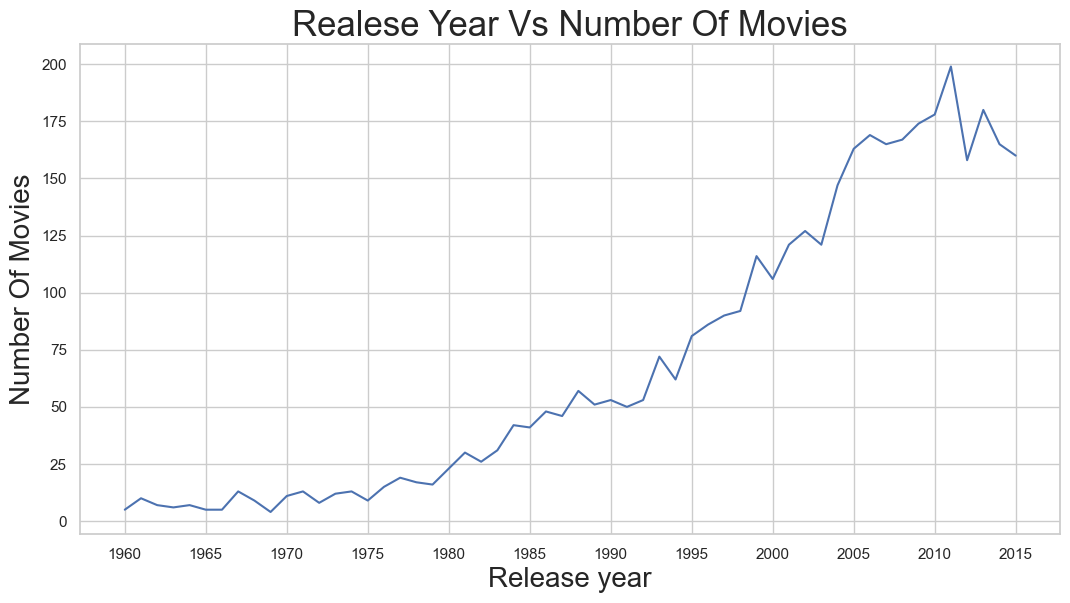

In [239]:
### make group for each year and count the number of movies in each year 
data=df.groupby('release_year').count()['original_title']
print(data.tail())

### make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['original_title'].plot(xticks = np.arange(1960,2016,5))

### set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Realese Year Vs Number Of Movies",fontsize = 25)
plt.xlabel('Release year',fontsize = 20)
plt.ylabel('Number Of Movies',fontsize = 20)

### set the style sheet
sns.set_style("whitegrid")


+ as we can see the film or movie industry  is in continuos growth and the market size is getting bigger and bigger and the peak was in 2011 by 199 movies.

## Which Movie has the Longest And the Shortest Rintime?

In [240]:
###change zero to NAN in runtime column.
df['runtime'] = df['runtime'].replace(0,np.NAN)

###find the movie with longest and shortest runtime by the max_min function that we defined before.
max_min('runtime')

Movie Which Has Highest runtime :  Carlos
Movie Which Has Lowest runtime  :  Kid's Story


2107  \
popularity                                               0.534192   
budget                                                   18000000   
gross_profit                                            -17128721   
revenue                                                    871279   
original_title                                             Carlos   
cast            Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...   
director                                          Olivier Assayas   
tagline                            The man who hijacked the world   
runtime                                                       338   
genres                               Crime|Drama|Thriller|History   
release_date                                  2010-05-19 00:00:00   
release_year                                                 2010   

                                                             5162  
popularity                                               0.208637  
budget                                                         10  
gross_profit                                                   -5  
revenue                                                         5  
original_title                                        Kid's Story  
cast            Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...  
director                                      Shinichiro Watanabe  
tagline                                                       NaN  
runtime                                                        15  
genres                                  Science Fiction|Animation  
release_date                                  2003-06-02 00:00:00  
release_year                                                 2003

+ as we can see the longest runtime movie is 'Carlos' for 338 min which is Crime|Drama|Thriller|History movie. and the shortest runtime movie is 'Kid's Story' for 15 min. which is Science Fiction|Animation movie.
+ as we can see too there is no relation between runtime and gross-profit. (long runtime does not mean high profit).

## Which movie has the highest and the lowest budget ?

In [241]:
max_min('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Lost & Found


2244  \
popularity                                                0.25054   
budget                                                  425000000   
gross_profit                                           -413912431   
revenue                                                  11087569   
original_title                                  The Warrior's Way   
cast            Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   
director                                               Sngmoo Lee   
tagline                                   Assassin. Hero. Legend.   
runtime                                                       100   
genres                  Adventure|Fantasy|Action|Western|Thriller   
release_date                                  2010-12-02 00:00:00   
release_year                                                 2010   

                                                             2618  
popularity                                               0.090186  
budget                                                          1  
gross_profit                                                   99  
revenue                                                       100  
original_title                                       Lost & Found  
cast            David Spade|Sophie Marceau|Ever Carradine|Step...  
director                                             Jeff Pollack  
tagline         A comedy about a guy who would do anything to ...  
runtime                                                        95  
genres                                             Comedy|Romance  
release_date                                  1999-04-23 00:00:00  
release_year                                                 1999

+ as we can see 'The Warrior's Way' has the highest budget and the movie loss around to 400 Million. and lost&found movie should be deleted from the data because there is no way for a movie budget to be 1 dollar.

## Which Genres Have The Highest number of released movies?

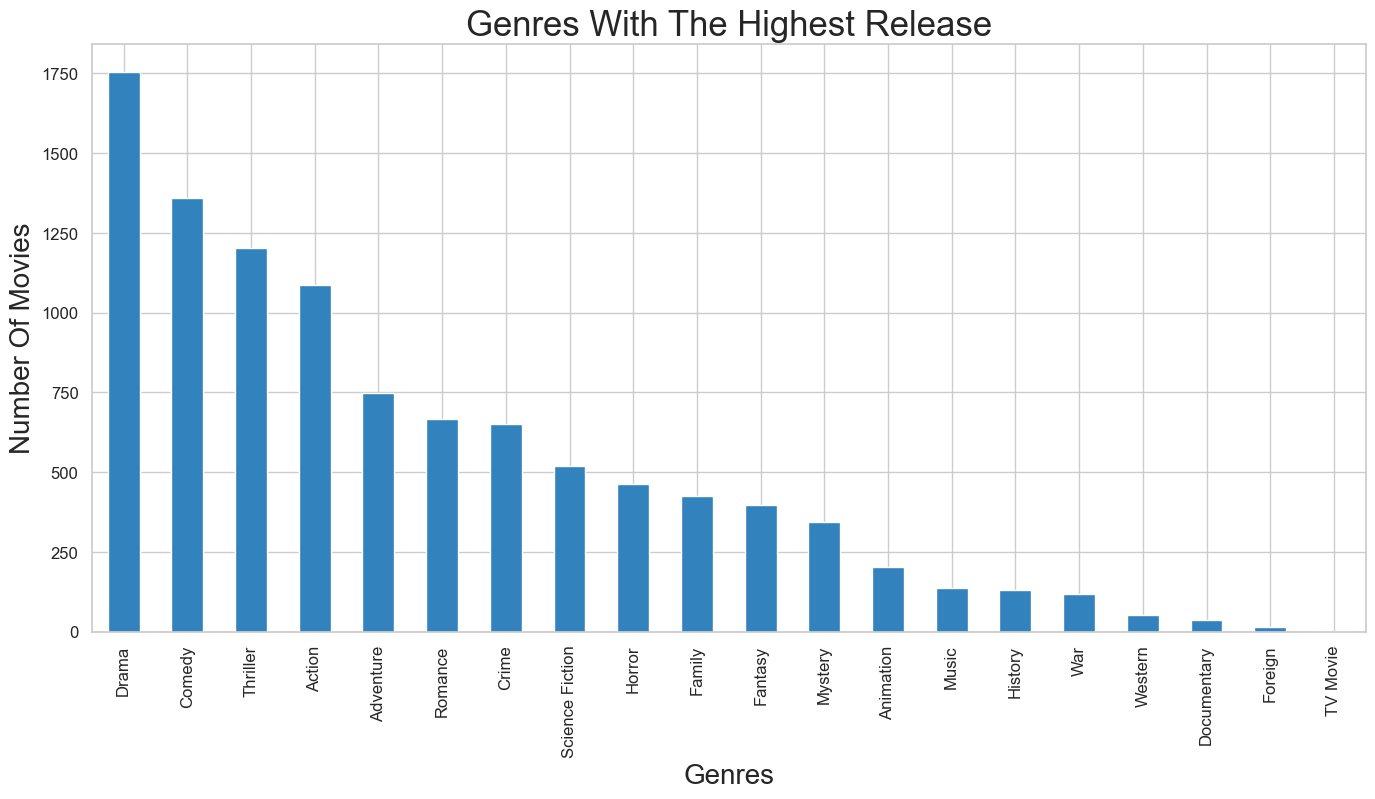

In [242]:
### define a function will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

### call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')

### plot a bar plot for 'genres and number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='tab20c')

plt.title("Genres With The Highest Release",fontsize=25)
plt.xlabel('Genres',fontsize=20)
plt.ylabel("Number Of Movies",fontsize= 20)
sns.set_style("whitegrid")

 + here we can see that Drama movies have the highest number of released movies by 1750 movies, then Comedy by around to 1300 movies then Thriller, Action, Adventure...,elc. and TV Movie has the lowest number of released movies.

## What kinds of properties are associated with movies that have high revenues?

In [243]:
info = pd.DataFrame(df['gross_profit'].sort_values(ascending=False))
data_set = ['budget','revenue','original_title','cast','director','runtime','genres','release_year']
for i in data_set:
    info[i] = df[i]
info.head()


gross_profit     budget     revenue                original_title  \
1386    2544505847  237000000  2781505847                        Avatar   
3       1868178225  200000000  2068178225  Star Wars: The Force Awakens   
5231    1645034188  200000000  1845034188                       Titanic   
0       1363528810  150000000  1513528810                Jurassic World   
4       1316249360  190000000  1506249360                     Furious 7   

                                                   cast         director  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...    James Cameron   
3     Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...      J.J. Abrams   
5231  Kate Winslet|Leonardo DiCaprio|Frances Fisher|...    James Cameron   
0     Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
4     Vin Diesel|Paul Walker|Jason Statham|Michelle ...        James Wan   

      runtime                                     genres  release_year  
1386      162   Action|Adventure|Fantasy|Science Fiction          2009  
3         136   Action|Adventure|Science Fiction|Fantasy          2015  
5231      194                     Drama|Romance|Thriller          1997  
0         124  Action|Adventure|Science Fiction|Thriller          2015  
4         137                      Action|Crime|Thriller          2015

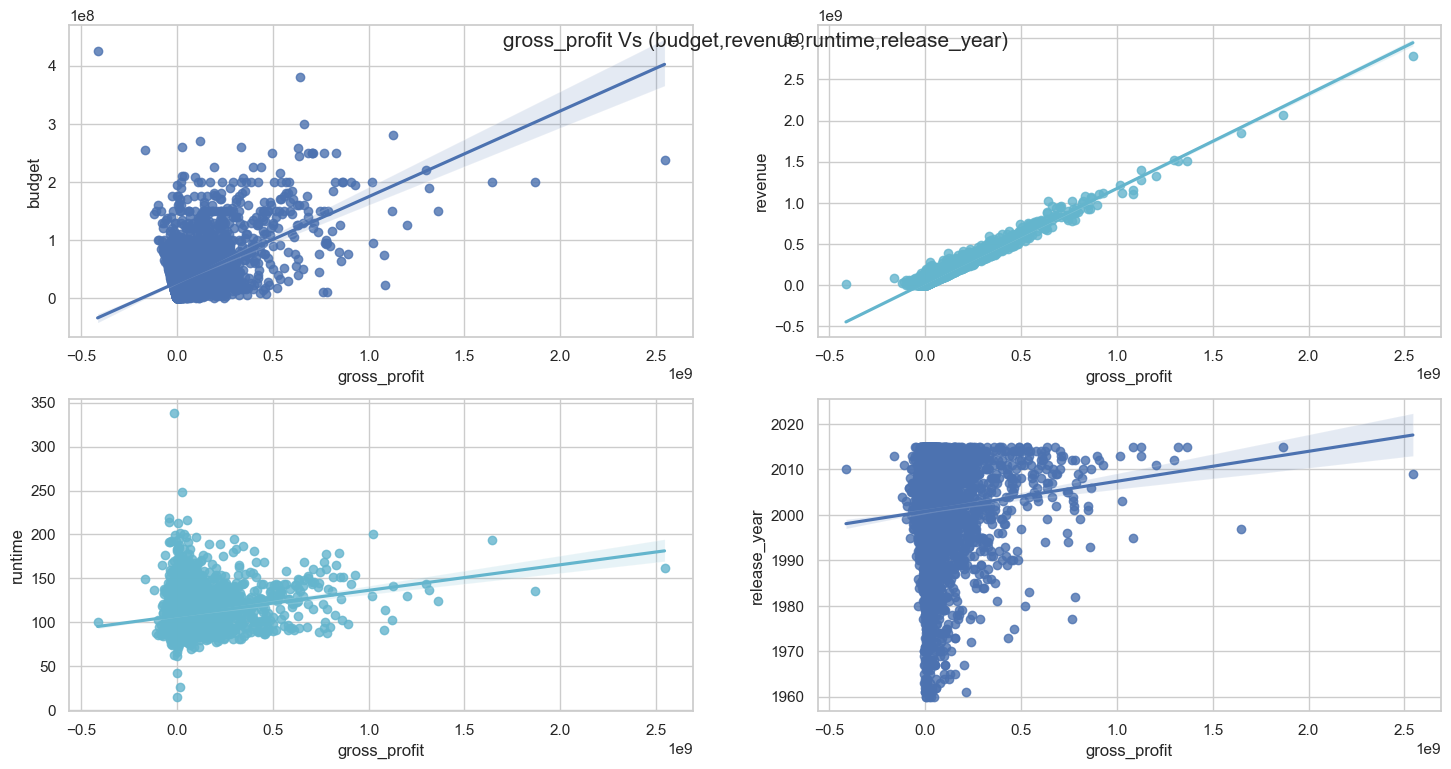

In [244]:
fig, axes = plt.subplots(2,2,figsize = (14,7))
fig.suptitle("gross_profit Vs (budget,revenue,runtime,release_year)",fontsize=15)


sns.regplot(x=df['gross_profit'], y=df['budget'],color='b',ax=axes[0][0])
sns.regplot(x=df['gross_profit'], y=df['revenue'],color='c',ax=axes[0][1])
sns.regplot(x=df['gross_profit'], y=df['runtime'],color='c',ax=axes[1][0])
sns.regplot(x=df['gross_profit'], y=df['release_year'],color='b',ax=axes[1][1])

sns.set_style("whitegrid")

## as we can see 

### The correlation between gross_profit and:
 1) budget : is a Positive Correlation ( highly affected ).
 2) revenue : is a positive Correlation ( highly affected ).
 3) runtime : without consider the outliers you will find there is no correlation between runtime and gross_profit.
 4) release_year : is a positive correlation ( slightly affected).

In [245]:

#map all the rows of genres in a list.
genre_details = list(map(str,(df['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1


In [246]:
#calculate the standard deviation.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()


1960      1961      1962      1963      1964      1965  \
Adventure        0.705931  1.437183  2.710171  1.923461  1.022476  1.665470   
Science Fiction -0.717114 -0.762280 -0.623943 -0.750602 -0.911998 -0.781827   
Fantasy         -0.717114 -0.762280 -0.623943 -0.750602  0.307291 -0.781827   
Crime           -0.717114 -0.177595 -0.068337 -0.750602 -0.505053 -0.781827   
Western          0.705931 -0.649446  0.084050 -0.750602 -0.911998 -0.781827   

                     1966      1967      1968      1969  ...      2006  \
Adventure        1.132612  2.442594  2.298155  1.999674  ...  0.900711   
Science Fiction  0.029983 -0.831207  1.984656 -0.686877  ... -0.259892   
Fantasy         -0.732002 -0.715169 -0.711085 -0.686877  ...  0.190496   
Crime           -0.732002  0.474892 -0.240488  0.835902  ...  0.135996   
Western          0.722680 -0.831207 -0.339560  1.526871  ... -1.012408   

                     2007      2008      2009      2010      2011      2012  \
Adventure        0.708729  1.142679  1.369903  1.437511  0.922247  1.173972   
Science Fiction -0.373561  0.199341  0.989288  0.032293  0.398418  0.396839   
Fantasy          0.584398  0.058617  0.312279  0.306877  0.212083  0.308991   
Crime            0.433963  0.489647 -0.470769 -0.067855  0.117937  0.168453   
Western         -1.033974 -0.985933 -1.070939 -0.919216 -0.898672 -0.789772   

                     2013      2014      2015  
Adventure        1.315606  1.641152  1.891133  
Science Fiction  0.805604  1.256819  1.437719  
Fantasy          0.008322  0.031096 -0.300706  
Crime            0.500124 -0.327002  0.069980  
Western         -0.952559 -0.907407 -0.697014  

[5 rows x 56 columns]

<AxesSubplot:>

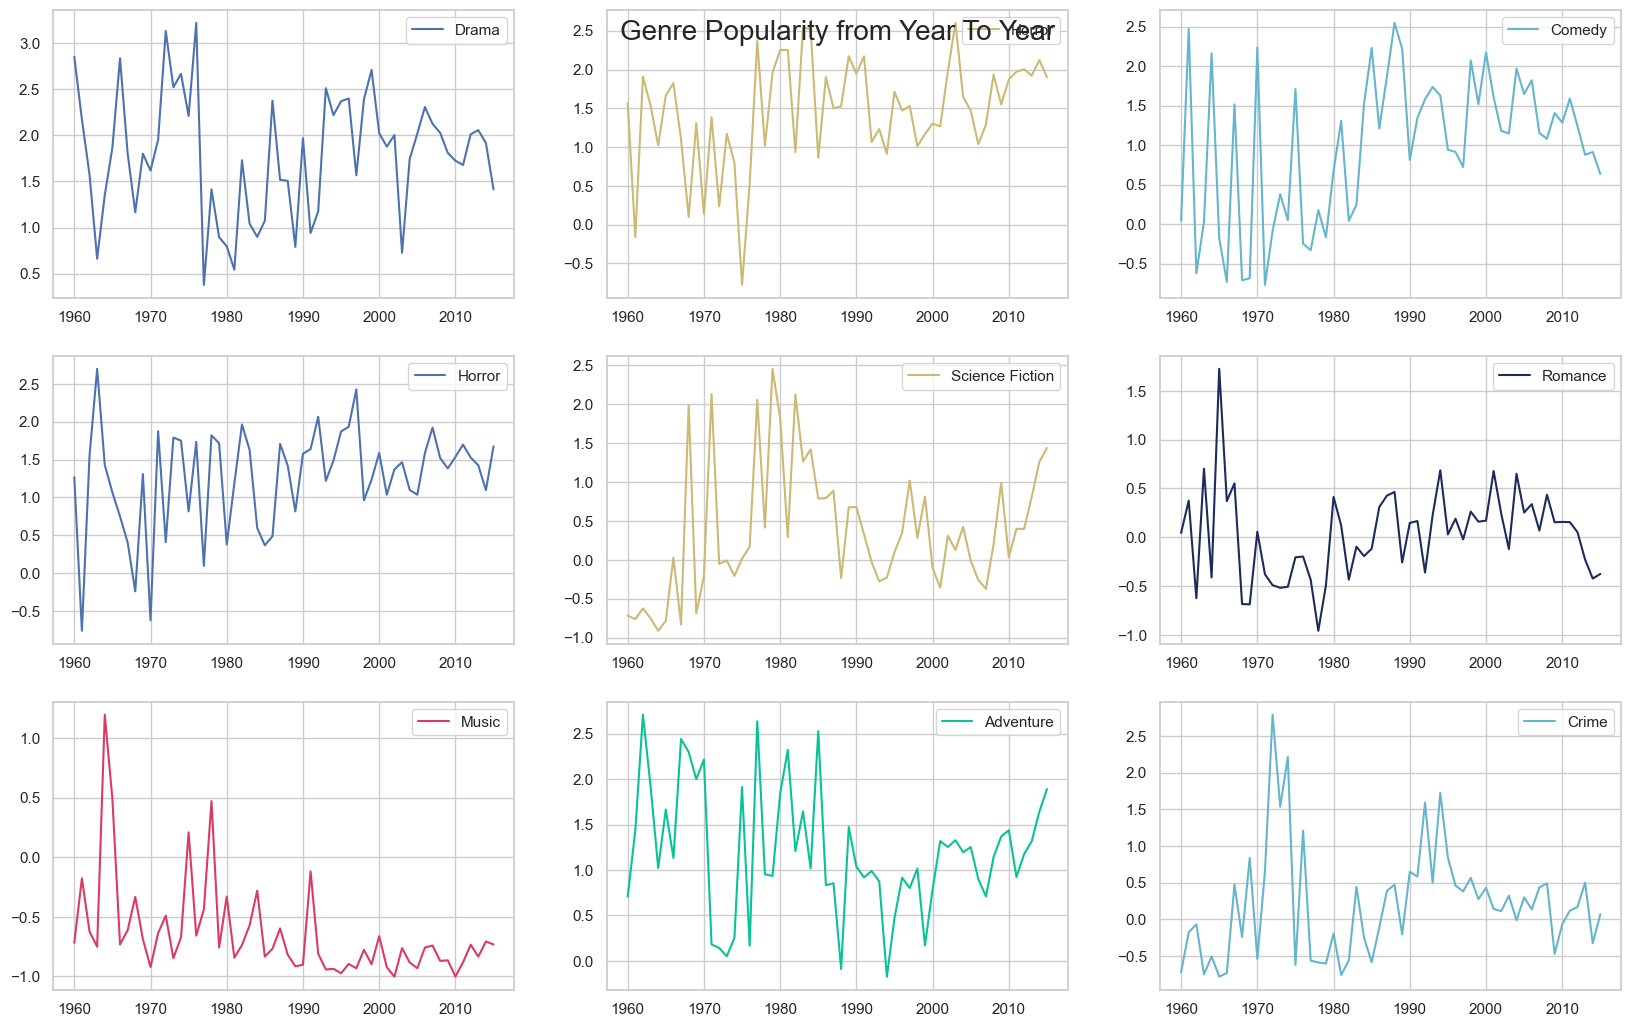

In [247]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity from Year To Year',fontsize = 20)

#plot the genres plot see the popularity difference over year to year.
popular_genre.loc['Drama'].plot(label = "Drama",color = 'b',ax = ax[0][0],legend=True)
popular_genre.loc['Action'].plot(label = "Horror",color='y',ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='c',ax = ax[0][2],legend=True)
popular_genre.loc['Thriller'].plot(label = "Horror",color='b',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='y',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)


<a id='conclusions'></a>
# Conclusions

## Results:


 1) Avatar'has the highest profit around to 2 Billion and it's an Action|Adventure|Fantasy|Science Fiction movie.
 2) 'The Warrior's Way' has no profit at all unfortunately it has the highest loss around to 400 Million and it's an Adventure|Fantasy|Action|Western|Thriller.
 3) The movie industry is in continuos growth and the market size is getting bigger and bigger and the peak was in 2011 by 199 movies.
 4) The longest runtime movie is 'Carlos' for 338 min which is Crime|Drama|Thriller|History movie.
 5) the shortest runtime movie is 'Kid's Story' for 15 min. which is Science Fiction|Animation movie.
 6) there is no relation between runtime and gross-profit. (long runtime does not mean high profit).¶
 7) 'The Warrior's Way' has the highest budget and the movie loss around to 400 Million.
 8) The Drama movies have the highest number of released movies by 1750 movies.
 9) The TV Movie has the lowest number of released movies.
 10) The correlation between gross_profit and:
     1) budget : is a Positive Correlation ( highly affected ).
     2) revenue : is a positive Correlation ( highly affected ).
     3) runtime : without consider the outliers you will find there is no correlation between runtime and gross_profit.
     4) release_year : is a positive correlation ( slightly affected).
     
## Limitations:

1)  there is alot of data should be dropped like lost&found movie should be deleted from the data because there is no way for a movie budget to be 1 dollar.
2) During Cleaning Process there is alot of NAN and zeros value and we dropped them and maybe this will affect our results.
3) During the Gross profit calculations we igonred the outliers, and taking them into consideration maybe will affect our results.
4) The code maybe take time to return results but it's working completely fine.
 